# Monte Carlo Markov Chain
This notebook introduces how to use monte carlo markov chain (mcmc) sampling method to estimate the probability distribution of unknown parameters and then further to get the optimal values of the parameters and confidence intervals from the postprior distribution. We will illustrate this method taking the example of fitting a 2d straight line based on some noisy point (y = Ax, A = [a0,a1]) where a1 is the slope and a0 is the intercept.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn,rand

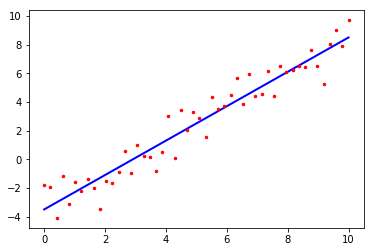

In [61]:
# generate synthetic noisy data points
mtrue = np.array([[-3.5],[1.2]])
nx = 50
x = np.array([np.linspace(0,10,nx)]).T
X = np.hstack((np.ones([nx,1]),x))
ytrue = np.dot(X,mtrue)

noise = 1;
y = ytrue + noise*randn(nx,1)

plt.figure()
plt.plot(x,ytrue,'b-',linewidth=2)
plt.plot(x,y,'r.',markersize=5)
plt.show()


In [74]:
num_iter = 100000
step = 1
miter = np.zeros([2,num_iter]) # each column is a mcmc sample

#m0 = np.zeros([2,1])
m0 = np.array([[10],[15]])
for ii in np.arange(num_iter):
    misfit0 = y - np.dot(X,m0)
    log_proba0 = -0.5*np.dot(misfit0.T,misfit0)
    
    m = m0 + step*randn(2,1) # propose a new sample point based on the previous point using gaussian distribution
    misfit = y - np.dot(X,m)
    log_proba = -0.5*np.dot(misfit.T,misfit)
    
    alpha = np.minimum(np.exp(log_proba - log_proba0),1)
    
    if alpha >= rand(1): # accept or reject
        miter[:,[ii]] = m
        m0 = m
    else:
        miter[:,[ii]] = m0
    

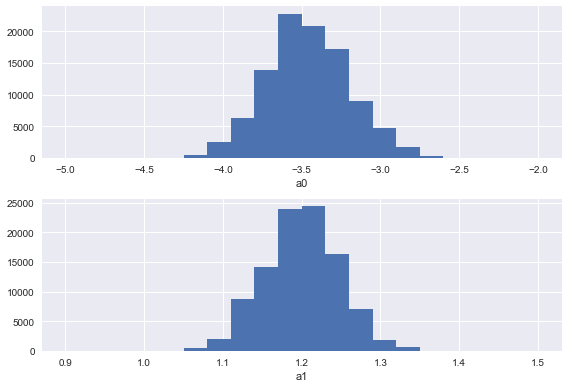

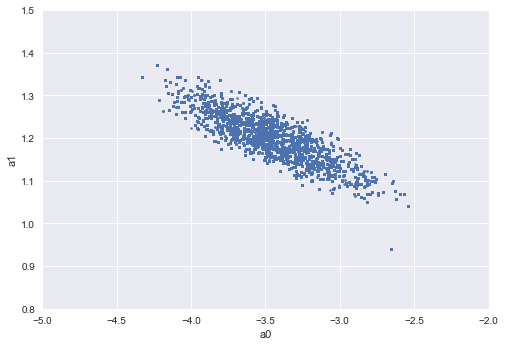

In [75]:
# plot the marginal probability of the two parameters
#fig = plt.figure()
#ax1 = fig.add_subplot(2,1,1)
#ax1.hist(miter[0,:],20,(-5,-2))
#ax1.set_xlabel('a0')
#ax2 = fig.add_subplot(2,1,2)
#ax2.hist(miter[1,:],20,(0.9,1.5))
#ax2.set_xlabel('a1')
#fig.show()

plt.style.use('seaborn')
plt.figure()
plt.subplot(2,1,1)
plt.hist(miter[0,:],20,(-5,-2))
plt.xlabel('a0')
plt.subplot(2,1,2)
plt.hist(miter[1,:],20,(0.9,1.5))
plt.xlabel('a1')
plt.tight_layout()
plt.show()

# plot joint probability distribution
plt.figure()
plt.plot(miter[0,:],miter[1,:],'.',markersize=5)
plt.xlabel('a0')
plt.ylabel('a1')
plt.xlim([-5,-2])
plt.ylim([0.8,1.5])
plt.show()
